# <center>**<span style="color:#3f9ae0">Instacart Market Basket Analysis</span>**</center>


| Name                      | Student ID   |
|---------------------------|--------------|
| Eslam Ahmed Mohamed       | 202000039    |
| Mariam Barakat            | 202000210    |
| Reem Amgad Mostafa        | 202000438    |
| Samaa Maged Ahmed         | 202000597    |
| Abdelrahman Yasser Saeed  | 202000933    |

## <span style="color:#6ebdfa">Instacart Dataset 🛒</span>

The Instacart dataset is a publicly available dataset released by Instacart, aMarkdown All in One: Create Table of ContentsMarkdown All in One: Create Table of ContentsMarkdown All in One: Create Table of Contents popular grocery delivery service. It consists of anonymized transactional data from real customers, including their orders of various products from the Instacart platform. The dataset provides valuable insights into customer behavior, shopping patterns, and product relationships.

The Instacart dataset contains the following information:

1. **<span style="color:#6ebdfa">Order data</span>**: Details about each order, including the order ID, customer ID, order timestamp, and days since prior order.

2. **<span style="color:#6ebdfa">Product data</span>**: Information about the products available on Instacart, such as the product ID, product name, aisle, and department.

3. **<span style="color:#6ebdfa">User data</span>**: Demographic information about the customers, including age, gender, and number of dependents.

4. **<span style="color:#6ebdfa">Order history</span>**: A history of each customer's past orders, including the products they purchased and the sequence in which they were added to the cart.

The dataset is commonly used for data analysis and machine learning tasks such as market basket analysis, recommendation systems, and customer segmentation. Researchers and data scientists leverage this dataset to gain insights into consumer behavior and develop data-driven strategies in the grocery retail industry.


## <span style="color:#fa6e6e">Our Goals 🎯</span>

The Following is what we are trying to achieve:

1. Implement Apriori, FP-Growth and Eclat Algorithms 
2. Compare between the later algorithms results and complexity 
3. Find association rules to find insight about products that need to be recommended together



## <span style="color:#6ebdfa">Most important files</span>
1. Products Table
   
| Column         | Description                                        |
| -------------- | -------------------------------------------------- |
| product_id     | Unique id for each product                         |
| product_name   | Product name for the specific id                    |
| aisle_id       | The aisle id in which the product exists            |
| department_id  | The department id in which the product exists       |

2. Orders Table
   
| Column                  | Description                                                              |
| ----------------------- | ------------------------------------------------------------------------ |
| order_id                | Unique id for each order                                                  |
| user_id                 | The id of the user of the specific order                                   |
| eval_set                | Tells to which set (prior, train, test) an order belongs                  |
| order_number            | The number of the order                                                   |
| order_dow               | The day of the week the order was made                                    |
| order_hour_of_day       | The hour of the day the order was made                                     |
| days_since_prior_order  | The number of days since the previous order was made (if this order is reordered) |

3. Ordered_products_prior and Order_products_train
   

| Column Name         | Description                                                |
|---------------------|------------------------------------------------------------|
| order_id            | The id of the previous order                                |
| product_id          | The product id in the previous order                        |
| add_to_cart_order   | The order in which the previous product was added to the cart|
| reordered           | Indicates whether the customer has reordered the product    |

## <span style="color:#6ebdfa">1. Import Modules</span>

In [1]:
import pandas as pd
import plotly.express as px
from mlxtend.frequent_patterns import fpgrowth
from sklearn.preprocessing import OneHotEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
from pyECLAT import ECLAT
import time
from pycaret.arules import *
import plotly.express as px
import numpy as np

## <span style="color:#6ebdfa">2. Create Transaction Table</span>
Already created this before and it is called listed_orders. It combines all products bought in an order so that we can use the built in functions easily.

This is from the following file: **Order_products_train**

In [2]:
transaction_table = pd.read_csv('tran_table.csv')

In [3]:
transaction_table.head(10)

,order_id,products
0,3179,"Lime Sparkling Water, Caramel Almond and Sea S..."
1,9180,"Sour Cream, Organic Diced Tomatoes, Fat Free B..."
2,4827,"Reduced Fat Milk 100% Lactose Free, Banana, Sm..."
3,5933,"Organic Strawberries, Organic Navel Orange, La..."
4,2021,"Granny Smith Apples, Organic Raw Unfiltered Ap..."
5,4201,"Truvia Sweetener Packets, Seedless Red Grapes,..."
6,2468,Lunchables Turkey & Cheddar Sub Sandwich With ...
7,17102,"Canola Oil, Antiseptic Mouth Rinse"
8,4790,"Organic Fuji Apple, Strawberries, Non Dairy Ch..."
9,3309,"Vinyl Glove Powder Free, Organic Whipping Crea..."


In [4]:
print("The amount of transactions: ", len(transaction_table))

The amount of transactions:  131209


**<span style="color:#e0b53f"> 🔍 seems that people that go this market are people who are trying to be healthy and eat organic spies, fruits and vegetables</span>**

## <span style="color:#6ebdfa">3. Association Rules</span>

The following algorithms will be implemented:

1. Apriori Algorithm
2. FP-Growth Algorithm
3. Eclat Algorithm

Let us first see how the data looks

In [5]:
# Create an empty list to store the column values
column_list = []

# Loop over the values in the 'column_name' column and add them to the list
for value in transaction_table['products']:
    my_list = value.split(",")
    column_list.append(my_list)

In [6]:

te = TransactionEncoder()
te_ary = te.fit(column_list).transform(column_list)
df_ = pd.DataFrame(te_ary, columns=te.columns_)
df_

,,Apricot & Banana Stage 2 Baby Food,Broad Spectrum SPF 30,Instant,Livermore Valley,Low Sodium Marinara,Premium,Vetiver scent,Whole,#2,...,with Dawn Action Pacs Fresh Scent Dishwasher Detergent Pacs,with Olive Oil Mayonnaise,with Seasoned Roasted Potatoes Scrambled Eggs & Sausage,with Sweet & Smoky BBQ Sauce Cheeseburger Sliders,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,with a Splash of Pineapple Coconut Water,Lightly Seasoned with Rosemary and Roasted Garlic Family Size Herb Chicken Tortellini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131207,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### <center><span style="color:#6ebdfa">1. Apriori Algorithm</span></center>

1. **<span style="color:#fa6e6e"> Python Generator</span>**: A Python generator is an iterator that generates values on-the-fly, allowing you to iterate over a sequence without storing all the values in memory at once. It is memory-efficient and useful for handling large datasets or when accessing values incrementally.
   
   <img src="download.png" alt="Image" style="max-width:150%; max-height:150%;">

2. **<span style="color:#fa6e6e"> mlxtend.apriori</span>**: The `apriori` function from `mlxtend.frequent_patterns` is a powerful tool for market basket analysis. It implements the Apriori algorithm and provides a simple interface for discovering frequent itemsets in transactional datasets. With customizable parameters and integration with the MLxtend library, `apriori` offers ease of use, flexibility, and good performance for market basket analysis tasks.

**<span style="color:#fa6e6e"> How to choose the min_support❔</span>**

- **Minimum Support:** refers to the minimum frequency or occurrence threshold that an itemset or item must meet to be considered significant in a dataset. It is a parameter used in frequent itemset mining and association rule learning algorithms, determining the minimum level of popularity required for an itemset to be considered frequent.
- **min_support** = (support_count of itemset) / (total number of transactions)


In [7]:
apriori(df_, min_support=0.01, use_colnames=True)

,support,itemsets
0,0.015708,( 100% Whole Wheat Bread)
1,0.015837,( Apple Honeycrisp Organic)
2,0.027338,( Asparagus)
3,0.014344,( Bag)
4,0.088340,( Bag of Organic Bananas)
...,...,...
103,0.010076,"( Strawberries, Banana)"
104,0.010982,"( Limes, Large Lemon)"
105,0.011303,"( Organic Baby Spinach, Organic Strawberries)"
106,0.010289,"( Organic Hass Avocado, Organic Strawberries)"


In [8]:
apriori(df_, min_support=0.05, use_colnames=True)

,support,itemsets
0,0.088340,( Bag of Organic Bananas)
1,0.108262,( Banana)
2,0.057618,( Large Lemon)
3,0.067945,( Organic Baby Spinach)
4,0.076169,( Organic Strawberries)


In [9]:
apriori(df_, min_support=0.09, use_colnames=True)

,support,itemsets
0,0.108262,( Banana)


**<span style="color:#e0b53f"> 🔍 As we increase the minimum support the less items we get. To have as much as info as possible, we will take min_support = 0.01</span>**
- The number that we are trying here, were from a collection of a wider range. But for the sake of demonstration we tried on a specific range we know will give reasonable information

In [10]:
df_apriori = apriori(df_, min_support=0.01,  use_colnames=True)

In [11]:
df_apriori = df_apriori.sort_values('support', ascending=False)

In [12]:
df_apriori.head(120)

,support,itemsets
5,0.108262,( Banana)
4,0.088340,( Bag of Organic Bananas)
68,0.076169,( Organic Strawberries)
37,0.067945,( Organic Baby Spinach)
28,0.057618,( Large Lemon)
...,...,...
21,0.010403,( Green Onions)
89,0.010319,( Strawberry)
106,0.010289,"( Organic Hass Avocado, Organic Strawberries)"
103,0.010076,"( Strawberries, Banana)"


**<span style="color:#e0b53f"> 🔍 As there is a stage as we increase the confidence the amount of item association doesn't matter, however at some point everything disappears</span>**
- We will redo the code but in a demonstrative graphical and visual method 

In [13]:
# try a variety of confidance to see the reaction
confidance_x =[]
size_association_y = []
for j in range(1, 601, 1):
    i = j / 1000.0  # Convert to the desired scale
    rule = association_rules(df_apriori, metric="confidence", min_threshold= i)
    length = len(rule)
    size_association_y.append(length)
    confidance_x.append(i)

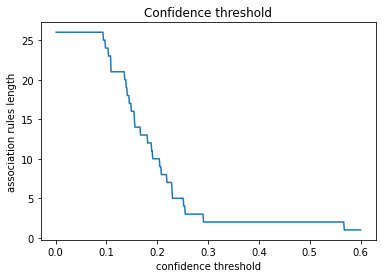

In [14]:

# Plotting the line graph
plt.plot(confidance_x , size_association_y)

# Adding labels and title
plt.xlabel('confidence threshold')
plt.ylabel('association rules length')
plt.title('Confidence threshold')

# Displaying the graph
plt.show()


**<span style="color:#fa6e6e"> What if we want the top 10 associations❔</span>**

We will find when the association rules length was 10, and at what confidence threshold this was.

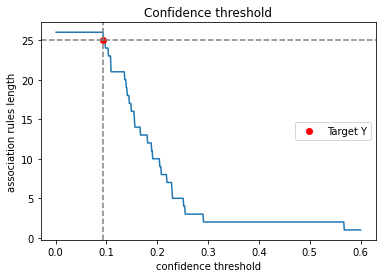

In [15]:
import matplotlib.pyplot as plt

# Plotting the line graph
plt.plot(confidance_x , size_association_y)

# Adding labels and title
plt.xlabel('confidence threshold')
plt.ylabel('association rules length')
plt.title('Confidence threshold')

# Find corresponding x for a given y
target_y = 25
closest_value = min(size_association_y, key=lambda x: abs(x - target_y))
corresponding_x = confidance_x[size_association_y.index(target_y)]

# Plot a point for the corresponding x and y values
plt.plot(corresponding_x, target_y, 'ro', label='Target Y')
# Add lines that reach the axis
plt.axhline(y=target_y, color='gray', linestyle='--')
plt.axvline(x=corresponding_x, color='gray', linestyle='--')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [16]:
rule_APRIORI = association_rules(df_apriori, metric="confidence", min_threshold= 0.09)
rule_APRIORI

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( Organic Strawberries),( Bag of Organic Bananas),0.076169,0.088340,0.016645,0.218531,2.473751,0.009916,1.166598,0.644875
1,( Bag of Organic Bananas),( Organic Strawberries),0.088340,0.076169,0.016645,0.188422,2.473751,0.009916,1.138315,0.653484
2,( Organic Hass Avocado),( Bag of Organic Bananas),0.049509,0.088340,0.012453,0.251539,2.847402,0.008080,1.218047,0.682597
3,( Bag of Organic Bananas),( Organic Hass Avocado),0.088340,0.049509,0.012453,0.140971,2.847402,0.008080,1.106472,0.711672
4,( Organic Baby Spinach),( Bag of Organic Bananas),0.067945,0.088340,0.012255,0.180370,2.041773,0.006253,1.112283,0.547424
5,( Bag of Organic Bananas),( Organic Baby Spinach),0.088340,0.067945,0.012255,0.138728,2.041773,0.006253,1.082185,0.559671
6,( Banana),( Organic Strawberries),0.108262,0.076169,0.011775,0.108765,1.427945,0.003529,1.036574,0.336078
7,( Organic Strawberries),( Banana),0.076169,0.108262,0.011775,0.154593,1.427945,0.003529,1.054802,0.324402
8,( Banana),( Large Lemon),0.108262,0.057618,0.011767,0.108694,1.886461,0.005530,1.057305,0.526957
9,( Large Lemon),( Banana),0.057618,0.108262,0.011767,0.204233,1.886461,0.005530,1.120601,0.498637


In [17]:
plot_model(rule_APRIORI, plot = '2d')

In [18]:
plot_model(rule_APRIORI, plot = '3d')

### <center><span style="color:#6ebdfa">2. FP-Growth Algorithm</span></center>

In [19]:
fp_growth_df = fpgrowth(df_, min_support=0.01, use_colnames=True)

In [20]:
fp_growth_df

,support,itemsets
0,0.020669,( Sparkling Water Grapefruit)
1,0.108262,( Banana)
2,0.057618,( Large Lemon)
3,0.029868,( Organic Garlic)
4,0.021531,( Small Hass Avocado)
...,...,...
103,0.011219,"( Organic Avocado, Banana)"
104,0.011028,"( Organic Strawberries, Organic Raspberries)"
105,0.012453,"( Organic Hass Avocado, Bag of Organic Bananas)"
106,0.010289,"( Organic Hass Avocado, Organic Strawberries)"


**<span style="color:#e0b53f"> 🔍 Notice how FP-Growth is much faster than apriori</span>**

In [21]:
rule_FP = association_rules(fp_growth_df, metric="confidence", min_threshold= 0.09)
rule_FP

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( Banana),( Large Lemon),0.108262,0.057618,0.011767,0.108694,1.886461,0.005530,1.057305,0.526957
1,( Large Lemon),( Banana),0.057618,0.108262,0.011767,0.204233,1.886461,0.005530,1.120601,0.498637
2,( Organic Baby Spinach),( Banana),0.067945,0.108262,0.010571,0.155580,1.437069,0.003215,1.056036,0.326310
3,( Banana),( Organic Baby Spinach),0.108262,0.067945,0.010571,0.097642,1.437069,0.003215,1.032910,0.341063
4,( Organic Baby Spinach),( Bag of Organic Bananas),0.067945,0.088340,0.012255,0.180370,2.041773,0.006253,1.112283,0.547424
5,( Bag of Organic Bananas),( Organic Baby Spinach),0.088340,0.067945,0.012255,0.138728,2.041773,0.006253,1.082185,0.559671
6,( Organic Baby Spinach),( Organic Strawberries),0.067945,0.076169,0.011303,0.166349,2.183957,0.006127,1.108175,0.581635
7,( Organic Strawberries),( Organic Baby Spinach),0.076169,0.067945,0.011303,0.148389,2.183957,0.006127,1.094461,0.586812
8,( Limes),( Large Lemon),0.043137,0.057618,0.010982,0.254594,4.418648,0.008497,1.264253,0.808566
9,( Large Lemon),( Limes),0.057618,0.043137,0.010982,0.190608,4.418648,0.008497,1.182200,0.820990


In [22]:
plot_model(rule_FP, plot = '2d')

In [23]:
plot_model(rule_FP, plot = '3d')

**<span style="color:#e0b53f"> 🔍 Results are different than apriori</span>**
- The output of FP-Growth and Apriori algorithms can differ due to their underlying principles and techniques:
  - FP-Growth uses an efficient tree-based data structure called FP-Tree and does not generate candidate itemsets explicitly.
  - Apriori generates candidate itemsets and requires multiple passes over the transaction data.
- FP-Growth is generally faster and more suitable for large datasets compared to Apriori.
- The differences in approach can lead to variations in the frequent itemsets discovered and their corresponding support values.
- Consider the specific requirements, dataset size, and computational resources when choosing between FP-Growth and Apriori for market basket analysis.

### <center><span style="color:#6ebdfa">3. Eclat Algorithm</span></center>

ECLAT (Equivalence Class Clustering and Bottom-up Lattice Traversal) is an efficient algorithm for frequent itemset mining in transactional datasets. It works by exploiting the vertical data format, where transactions are represented as sets of items.

The steps involved in the ECLAT algorithm are as follows:

1. **<span style="color:#6ebdfa">Vertical Representation</span>**: Convert the transactional dataset into a vertical representation, where each item is associated with the set of transactions in which it appears.

2. **<span style="color:#6ebdfa">Initialization</span>**: Initialize an empty set called the "prefix" to store the current frequent itemsets.

3. **<span style="color:#6ebdfa">Recursive Process</span>**:
   - Start with a single item as the prefix and count its support by scanning the database.
   - If the support of the prefix is above a specified minimum support threshold, it is considered a frequent itemset.
   - Add the frequent itemset to the list of frequent itemsets.
   - Generate a new prefix by combining the frequent itemset with the remaining items.
   - Recursively repeat the process with the new prefix until no more frequent itemsets can be generated.

4. **<span style="color:#6ebdfa">Combining Frequent Itemsets</span>**: Combine the frequent itemsets obtained in the previous step to form larger itemsets. This is done by finding the intersections of their transactions.

5. **<span style="color:#6ebdfa">Repeat</span>**: Repeat the recursive process with the combined frequent itemsets to find larger itemsets until no more frequent itemsets can be generated.

6. **<span style="color:#6ebdfa">Termination</span>**: Stop the process when no more frequent itemsets can be found.

7. **<span style="color:#6ebdfa">Output</span>**: Return the list of all frequent itemsets that meet the minimum support threshold.

**<span style="color:#fa6e6e">However, it may perform poorly on sparse datasets or datasets with long transactions</span>**



In [24]:
dataset = pd.DataFrame(column_list).head(500)
dataset

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,Lime Sparkling Water,Caramel Almond and Sea Salt Nut Bar,Krinkle Cut Classic Barbecue Potato Chips,Sparkling Water Grapefruit,Honey Bunny Grahams,White Chocolate Macadamia Nut Energy Bar,Nuts & Spices,Dark Chocolate Mocha Almond,Tea Tree Scalp Treatment Shampoo,None,...,None,None,None,None,None,None,None,None,None,None
1,Sour Cream,Organic Diced Tomatoes,Fat Free Beef Broth,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Reduced Fat Milk 100% Lactose Free,Banana,Small Hass Avocado,Large Lemon,Pizza Dough,Red Bulgur Wheat,Green Split Peas,Prosciutto di San Daniele,Organic Garlic,Organic Ginger Root,...,None,None,None,None,None,None,None,None,None,None
3,Organic Strawberries,Organic Navel Orange,Large Grapefruit,Limes,Carrots,Organic Garlic,Red Peppers,Jalapeno Peppers,Organic Garnet Sweet Potato (Yam),Organic Baby Spinach,...,None,None,None,None,None,None,None,None,None,None
4,Granny Smith Apples,Organic Raw Unfiltered Apple Cider Vinegar,Organic Yellow Onion,Russet Potato,Yukon Gold Potatoes 5lb Bag,Vitamin D Milk,Chives,White Whole Mushrooms,Unsalted Chicken Cooking Stock,Garlic,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Clover Org Greek Plain,Electrolyte Enhanced Water,Organic Raspberries,Natural Spring Water,Goodness Grapeness Organic Juice Drink,Small Hass Avocado,Cheese Pizza,Water,Unsweet,Blood Orange,...,None,None,None,None,None,None,None,None,None,None
496,Cracked Wheat,Organic Greek Whole Milk Blended Vanilla Bean...,Navel Oranges,Spinach,Original Patties (100965) 12 Oz Breakfast,Cinnamon Multigrain Cereal,Chewy 25% Low Sugar Chocolate Chip Granola,Uncured Genoa Salami,Natural Vanilla Ice Cream,Lemon Yogurt,...,None,None,None,None,None,None,None,None,None,None
497,Chorizo Pork,Petite Peas,Max Gel Clog Remover,Green Beans,Naturally Hickory Smoked Hometown Original Bacon,Extra Virgin Olive Oil,Mediterranean Fine Sea Salt,Pure Ground,Large Lemon,None,...,None,None,None,None,None,None,None,None,None,None
498,Sparkling Grapefruit,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [25]:

# loading transactions DataFrame to ECLAT class
eclat = ECLAT(data=dataset)
# DataFrame of binary values
eclat.df_bin

,Unscented Long Lasting Stick Deodorant,Whole Grain Oat Cereal,Organic Insect Repellent Fresh Natural Scent,Roaster/Baker Pans & Lids,Grainiac Organic Bread,All Natural Sour Cream,Organic Rainbow Carrots,White Potato,Organic Cheese Frozen Pizza,Wild Blackberry Gelato,...,Red Potatoes,Organic Fat Free Refried Pinto Beans,Arrowroot Starch/Flour,Sweet Gherkin Pickles,Large Greenhouse Tomato,No Pulp Calcium & Vitamin D Pure Premium 100% Pure Orange Juice,Sugar Snap Peas,Original Black Box Tablewater Cracker,Roasted Turkey,Traditional Chicken Noodle Soup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# count items in each column
items_total = eclat.df_bin.astype(int).sum(axis=0)
items_total

 Unscented Long Lasting Stick Deodorant                             1
Whole Grain Oat Cereal                                              1
 Organic Insect Repellent Fresh Natural Scent                       1
 Roaster/Baker Pans & Lids                                          1
 Grainiac Organic Bread                                             1
                                                                   ..
 No Pulp Calcium & Vitamin D Pure Premium 100% Pure Orange Juice    2
 Sugar Snap Peas                                                    5
 Original Black Box Tablewater Cracker                              1
 Roasted Turkey                                                     1
 Traditional Chicken Noodle Soup                                    2
Length: 3356, dtype: int64

In [27]:
# count items in each row
items_per_transaction = eclat.df_bin.astype(int).sum(axis=1)
items_per_transaction

0       9
1       3
2      17
3      25
4      17
       ..
495    27
496    31
497     9
498     1
499     7
Length: 500, dtype: int64

In [28]:
# Loading items per column stats to the DataFrame
df = pd.DataFrame({'items': items_total.index, 'transactions': items_total.values}) 
# cloning pandas DataFrame for visualization purpose  
df_table = df.sort_values("transactions", ascending=False)
#  Top 5 most popular products/items
df_table.head(5).style.background_gradient(cmap='Blues')

,items,transactions
1733,Banana,54
2937,Organic Strawberries,41
96,Organic Baby Spinach,38
1218,Large Lemon,34
228,Bag of Organic Bananas,30


In [29]:
# to have a same origin
df_table["all"] = "Tree Map" 
# creating tree map using plotly
fig = px.treemap(df_table.head(50), path=['all', "items"], values='transactions',
                  color=df_table["transactions"].head(50), hover_data=['items'],
                  color_continuous_scale='Blues',
                )
# ploting the treemap
fig.show()

In [30]:
# Start the timer
start_time = time.time()

# the item shoud appear at least at 1% of transactions
min_support = 0.01
# start from transactions containing at least 2 items
min_combination = 2
rule_indices, rule_supports = eclat.fit(min_support=min_support,
                                                 min_combination=min_combination,
                                                 max_combination=2,
                                                 separator=' & ',
                                                 verbose=True)

elapsed_eclat = time.time() - start_time

Combination 2 by 2


10011it [20:27,  8.15it/s]


In [31]:
result = pd.DataFrame(rule_supports.items(),columns=['Item', 'support'])
result.sort_values(by=['support'], ascending=False)

,Item,support
38,Bunch & Organic Red Radish,0.020
4,Organic Baby Spinach & Banana,0.020
3,Organic Baby Spinach & Large Lemon,0.016
30,Organic Hass Avocado & Organic Strawberries,0.016
6,Organic Baby Spinach & Organic Garnet Sweet ...,0.016
39,Organic Cucumber & Organic Strawberries,0.016
34,Banana & Organic Strawberries,0.016
0,Organic Baby Spinach & Bag of Organic Bananas,0.014
25,Large Lemon & Organic Cucumber,0.014
23,Large Lemon & Organic Garlic,0.014


**<span style="color:#e0b53f"> 🔍 The time is sooo long! and said out of memory... this is why we only made it work on 500 products</span>**

Possible reasons:
- There are so many products that the vertical flipping is not the right choice
- Apriori and FP-growth in the mlxtend is very optimized and uses generators and other technologies to make it faster

## <span style="color:#6ebdfa">4. Comparing performance and Accuracy of Association rules</span>

### <span style="color:#6ebdfa">Complexity Analysis (the literature)</span>

#### <span style="background-color: #6ebdfa;">Apriori Algorithm Complexity</span>
- Time Complexity:
  - Generating frequent itemsets: O(n^2 * 2^m), where n is the number of transactions and m is the average number of items per transaction.
  - Generating association rules: O(2^m)
- Space Complexity: O(n * m), where n is the number of transactions and m is the average number of items per transaction.

#### <span style="background-color: #6ebdfa;"> FP-growth Algorithm Complexity</span>
- Time Complexity:
  - Building the FP-tree: O(n * m), where n is the number of transactions and m is the average number of items per transaction.
  - Mining frequent itemsets: O(2^m)
- Space Complexity: O(n * m), where n is the number of transactions and m is the average number of items per transaction.

#### <span style="background-color: #6ebdfa;">Eclat Algorithm Complexity</span>
- Time Complexity:
  - Building the vertical database: O(n * m), where n is the number of transactions and m is the average number of items per transaction.
  - Mining frequent itemsets: O(3^m)
- Space Complexity: O(n * m), where n is the number of transactions and m is the average number of items per transaction.

📝 We will only measure the time taken for processing intracart, as we are comparing on this data, and what suits it more.

In [32]:


# Start the timer
start_time = time.time()

df_apriori = apriori(df_, min_support=0.01)
rule_apriori = association_rules(df_apriori, metric="confidence", min_threshold= 0.09)

# Calculate the elapsed time
elapsed_time_apriori = time.time() - start_time


In [33]:


# Start the timer
start_time = time.time()

fp_growth_df = fpgrowth(df_, min_support=0.01, use_colnames=True)
rule_fp_growth = association_rules(fp_growth_df, metric="confidence", min_threshold= 0.09)

# Calculate the elapsed time
elapsed_time_fp_growth = time.time() - start_time


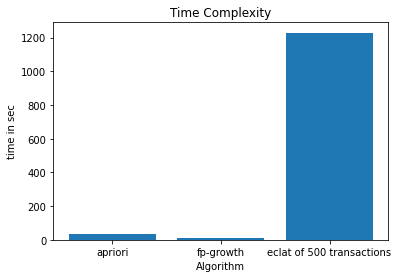

In [34]:
x = ["apriori", "fp-growth", "eclat of 500 transactions"]
y = [elapsed_time_apriori, elapsed_time_fp_growth, elapsed_eclat]

plt.bar(x, y)
plt.xlabel("Algorithm")
plt.ylabel("time in sec")
plt.title("Time Complexity")
plt.show()

**<span style="color:#e0b53f"> 🔍 FP- growth seems the most suitable for this data in terms of speed!</span>**

### <span style="color:#6ebdfa"> Accuracy by comparing the support, lift, confidence, conviction and leverage</span>


In [35]:
# Calculate metrics
support_apriori = rule_apriori["support"]
confidence_apriori = rule_apriori["confidence"]
lift_apriori = rule_apriori["lift"]

support_fpgrowth =rule_fp_growth["support"]
confidence_fpgrowth = rule_fp_growth["confidence"]
lift_fpgrowth = rule_fp_growth["lift"]

support_eclat = result["support"] 
#confidence_eclat = rules_eclat["confidence"]
#lift_eclat = rules_eclat["lift"]

### Support
Support measures the frequency of occurrence of an itemset in the dataset. It indicates how popular or common an itemset is within the transactions.

ValueError: x and y must have same first dimension, but have shapes (26,) and (11,)

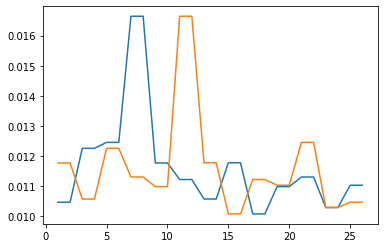

In [36]:
# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["support"]  # y-axis values for DataFrame 1
y2 = rule_fp_growth["support"]  # y-axis values for DataFrame 2
y3 = result["support"].head(11)


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')
plt.plot(x, y3, label='ECLAT')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of support')

# Add a legend
plt.legend()

# Display the graph
plt.show()


**<span style="color:#e0b53f"> 🔍The eclat only uses support as a metrics</span>**

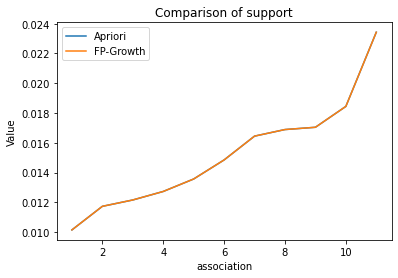

In [ ]:
# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["support"].sort_values()  # y-axis values for DataFrame 1
y2 = rule_fp_growth["support"].sort_values()  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of support')

# Add a legend
plt.legend()

# Display the graph
plt.show()


### Lift
Lift measures the strength of association between the antecedent and consequent of a rule, taking into account the support of the rule and the individual supports of the antecedent and consequent.

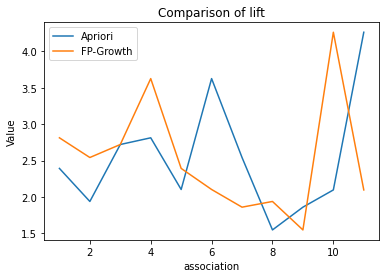

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["lift"] # y-axis values for DataFrame 1
y2 = rule_fp_growth["lift"]  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of lift')

# Add a legend
plt.legend()

# Display the graph
plt.show()


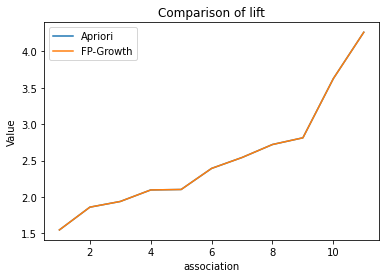

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["lift"].sort_values() # y-axis values for DataFrame 1
y2 = rule_fp_growth["lift"].sort_values()  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of lift')

# Add a legend
plt.legend()

# Display the graph
plt.show()


### Confidence
Confidence measures the reliability or certainty of a rule. It represents the conditional probability of finding the consequent given the antecedent.

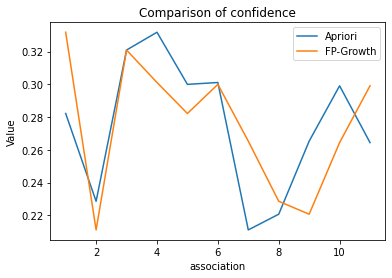

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["confidence"] # y-axis values for DataFrame 1
y2 = rule_fp_growth["confidence"]  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of confidence')

# Add a legend
plt.legend()

# Display the graph
plt.show()


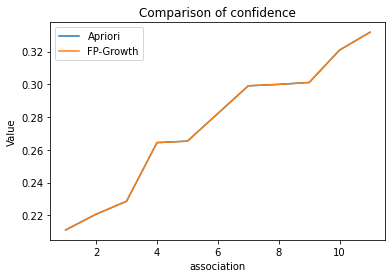

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["confidence"].sort_values() # y-axis values for DataFrame 1
y2 = rule_fp_growth["confidence"].sort_values()  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of confidence')

# Add a legend
plt.legend()

# Display the graph
plt.show()


### Conviction
Conviction measures the implication strength of a rule by comparing the expected and observed support of the consequent. It indicates the extent to which the rule is dependent on the antecedent.

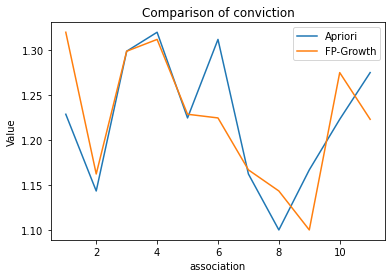

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["conviction"] # y-axis values for DataFrame 1
y2 = rule_fp_growth["conviction"]  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of conviction')

# Add a legend
plt.legend()

# Display the graph
plt.show()


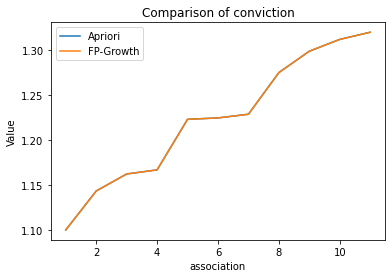

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["conviction"].sort_values() # y-axis values for DataFrame 1
y2 = rule_fp_growth["conviction"].sort_values()  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of conviction')

# Add a legend
plt.legend()

# Display the graph
plt.show()


### Leverage
Leverage measures the difference between the observed and expected support of the rule. It indicates how much the occurrence of the antecedent and consequent together deviates from what would be expected if they were independent.

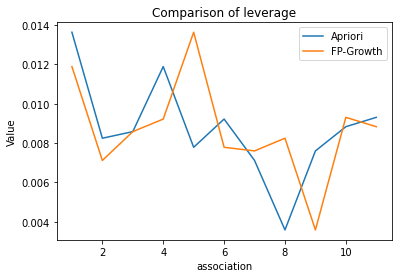

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["leverage"] # y-axis values for DataFrame 1
y2 = rule_fp_growth["leverage"]  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of leverage')

# Add a legend
plt.legend()

# Display the graph
plt.show()


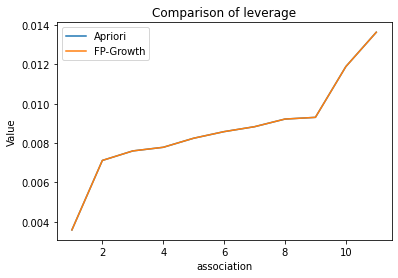

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["leverage"].sort_values() # y-axis values for DataFrame 1
y2 = rule_fp_growth["leverage"].sort_values()  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of leverage')

# Add a legend
plt.legend()

# Display the graph
plt.show()


## <span style="color:#6ebdfa">4. Conclusion</span>

1. FP - Growth is the fastest
2. FP-growth and apriori lead to the same average lift, support, confidence. 
3. The eclat algorithm is extrememly slow. 10 transactions take 10 times the time of all the transactions compared to apriori or fp-growth